## Developing a model for predicting f1 score for Lying

**From given dataset we have to build model for cow `lying` activities which can predict better f1 score**

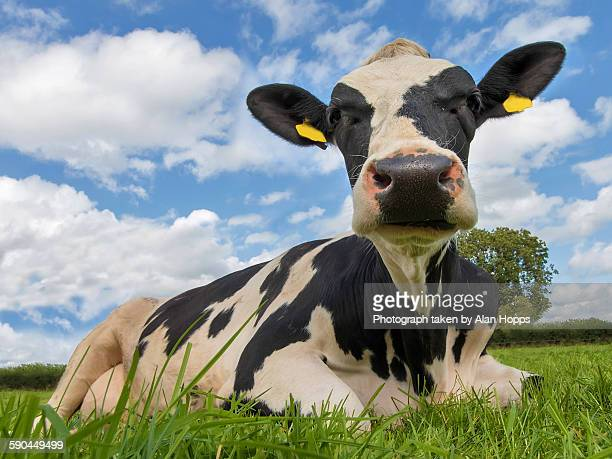

In [33]:
Image("gettyimages-590449499-612x612.png")

In [1]:
#Importing tools we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [2]:
#Importing dataset
df=pd.read_csv("L5_train.csv")

In [3]:
df.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628327460,-0.175293,0.979004,0.093262,0.488281,-3.417969,0.732422,-226.5,1356.0,565.5,5
1,1628327460,-0.192383,0.984863,0.098633,-0.915527,-6.896973,0.488281,-220.5,1348.5,580.5,5
2,1628327460,-0.188477,0.995117,0.075684,-3.112793,-7.202148,2.197266,-214.5,1342.5,565.5,5
3,1628327460,-0.163574,0.994629,0.069824,-5.859375,-7.690430,1.525879,-220.5,1342.5,576.0,5
4,1628327460,-0.158691,0.993652,0.073242,-8.239746,-5.737305,1.586914,-207.0,1360.5,580.5,5


In [4]:
df.dtypes

time       int64
acc_x    float64
acc_y    float64
acc_z    float64
gyr_x    float64
gyr_y    float64
gyr_z    float64
mag_x    float64
mag_y    float64
mag_z    float64
label      int64
dtype: object

In [5]:
df.isna().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

In [6]:
len(df)

1711687

In [7]:
df.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,1.711687e+06,1.711687e+06,1.711687e+06,1.711687e+06,1.711687e+06,1.711687e+06,1.711687e+06,1.711687e+06,1.711687e+06,1.711687e+06,1711687.0
mean,1.628192e+09,1.745629e-01,7.697055e-01,4.365494e-02,8.917464e-01,-1.657968e+00,-6.198534e-01,-5.084648e+02,5.674373e+02,2.060322e+02,5.0
std,1.150143e+05,2.784526e-01,5.061537e-01,1.845055e-01,1.002181e+01,1.194794e+01,6.420663e+00,3.410201e+02,5.088447e+02,4.272399e+02,0.0
min,1.628078e+09,-1.599756e+01,-4.286621e+00,-1.114111e+01,-8.787231e+02,-6.926880e+02,-9.846802e+02,-1.534500e+03,-6.465000e+02,-1.152000e+03,5.0
25%,1.628099e+09,6.152340e-02,8.422852e-01,-2.001950e-02,0.000000e+00,-2.868652e+00,-1.342773e+00,-7.185000e+02,1.095000e+02,7.500000e+01,5.0
50%,1.628128e+09,2.167969e-01,9.335938e-01,6.933590e-02,8.544922e-01,-1.708984e+00,-6.103516e-01,-5.610000e+02,7.215000e+02,1.935000e+02,5.0
75%,1.628318e+09,3.378906e-01,9.633790e-01,1.455078e-01,1.770020e+00,-4.272461e-01,6.103520e-02,-2.325000e+02,1.006500e+03,5.970000e+02,5.0
max,1.628408e+09,2.878906e+00,5.768066e+00,9.783691e+00,7.060547e+02,1.695618e+03,1.124146e+03,5.745000e+02,1.390500e+03,1.150500e+03,5.0


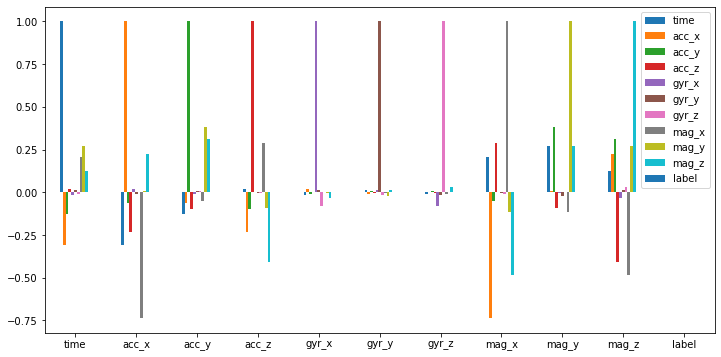

In [9]:
df.corr().plot(kind="bar",
              figsize=(12,6))
plt.xticks(rotation=0);

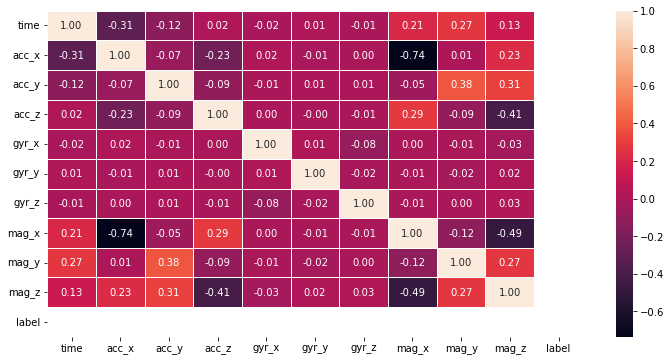

In [10]:
corr_mat=df.corr()
fig,ax=plt.subplots(figsize=(12,6))
ax=sns.heatmap(corr_mat,
              annot=True,
              linewidths=0.5,
              fmt=".2f")

In [12]:
#Importing train_test_split from sklearn model selaction
from sklearn.model_selection import train_test_split

#Creating X & y labels
X = df.drop("label",axis=1)
y = df["label"]

#Spliiting data into training and testing 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [13]:
X_train

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
821522,1628100337,-0.003906,0.989746,0.074219,0.183106,0.488281,-0.244141,-607.5,147.0,168.0
18797,1628329953,-0.276855,0.944824,-0.003906,1.098633,2.929688,-0.366211,-220.5,1339.5,574.5
705285,1628090968,0.214844,0.964356,0.098633,0.793457,-3.112793,-1.831055,-606.0,100.5,93.0
27923,1628330145,-0.270020,0.949707,-0.010742,1.464844,-0.732422,0.488281,-228.0,1371.0,580.5
29679,1628330182,-0.283691,0.944336,0.001953,1.770020,-1.586914,1.098633,-214.5,1359.0,583.5
...,...,...,...,...,...,...,...,...,...,...
570952,1628098937,-0.402344,0.906738,-0.024414,2.624512,-4.638672,-0.488281,282.0,-244.5,172.5
620895,1628089209,0.148926,0.970703,0.147949,1.464844,-1.037598,-0.427246,-523.5,100.5,60.0
557802,1628098446,-0.369141,0.906250,-0.053711,0.793457,-1.708984,1.647949,246.0,-222.0,177.0
1636312,1628317256,0.403809,0.832031,-0.305664,1.342773,-3.112793,-0.427246,-697.5,1054.5,433.5


In [14]:
X_test

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
168686,1628407545,-0.370605,0.919434,0.166992,2.746582,4.272461,-0.976563,-118.5,1279.5,199.5
794256,1628099764,0.175293,0.968262,0.084961,1.098633,1.037598,-1.342773,-571.5,111.0,100.5
448265,1628329122,0.001953,-0.996094,0.205566,1.159668,-1.770020,1.220703,-202.5,106.5,-604.5
130112,1628406502,-0.394043,0.881348,0.229981,14.831543,-1.037598,-1.647949,-139.5,1288.5,178.5
443699,1628329026,0.026856,-1.016113,0.179199,-0.427246,0.488281,-1.220703,-247.5,99.0,-585.0
...,...,...,...,...,...,...,...,...,...,...
601273,1628078500,0.301270,0.948731,-0.023926,2.929688,2.807617,-0.427246,-429.0,135.0,597.0
1507564,1628131366,0.369629,0.923340,-0.034668,-0.488281,-0.488281,-0.549316,-493.5,1038.0,666.0
5571,1628327577,-0.276855,0.950684,0.019531,-0.183106,-0.427246,-1.464844,-226.5,1356.0,558.0
1253637,1628092485,0.427734,0.901367,-0.000488,0.488281,-2.258301,-0.488281,-804.0,976.5,684.0


In [15]:
y_train

821522     5
18797      5
705285     5
27923      5
29679      5
          ..
570952     5
620895     5
557802     5
1636312    5
164937     5
Name: label, Length: 1369349, dtype: int64

In [16]:
y_test

168686     5
794256     5
448265     5
130112     5
443699     5
          ..
601273     5
1507564    5
5571       5
1253637    5
1419918    5
Name: label, Length: 342338, dtype: int64

In [17]:
#Impoting RandomForestRegressor from sklearn ensamble
from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor()

In [18]:
#Fitting model into X & y 
clf.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
clf.fit(X_test,y_test)

RandomForestRegressor()

In [20]:
#Fitting model into scoring parameter
clf.score(X_test, y_test)

1.0

In [23]:
clf.score(X_train,y_train)

1.0

In [24]:
#Prediction on X_test
y_pred =clf.predict(X_test)

In [25]:
y_pred

array([5., 5., 5., ..., 5., 5., 5.])

In [26]:
#Importing classification report 
from sklearn.metrics import classification_report


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           5       1.00      1.00      1.00    342338

    accuracy                           1.00    342338
   macro avg       1.00      1.00      1.00    342338
weighted avg       1.00      1.00      1.00    342338



In [29]:
#Importing f1 score
from sklearn.metrics import f1_score

In [30]:
f1 = f1_score(y_test,y_pred,average='weighted')

In [31]:
f1

1.0